In [1]:
# Reading the dataset

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

dataframe = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
print("Initial Dataset:")
print(dataframe.head())

Initial Dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [35]:
# Performing data preprocessing

In [37]:
dataframe['Description'] = dataframe['Description'].fillna('Unknown')
dataframe['CustomerID'] = dataframe['CustomerID'].ffill()
dataframe['CustomerID'] = dataframe['CustomerID'].astype(int)
dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])

label_encoder = LabelEncoder()
dataframe['CountryEncoded'] = label_encoder.fit_transform(dataframe['Country'])
dataframe['DescriptionEncoded'] = label_encoder.fit_transform(dataframe['Description'])
dataframe['InvoiceNoEncoded'] = label_encoder.fit_transform(dataframe['InvoiceNo'])
dataframe['StockCodeEncoded'] = label_encoder.fit_transform(dataframe['StockCode'])

print("Preprocessed Dataset: ")
print(dataframe.head())

Preprocessed Dataset: 
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  CountryEncoded  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom              36   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom              36   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom              36   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom              36   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom              36   

   DescriptionEncoded  InvoiceNoEncoded  StockCodeEncoded  
0  

In [39]:
# EDA and Visualizations

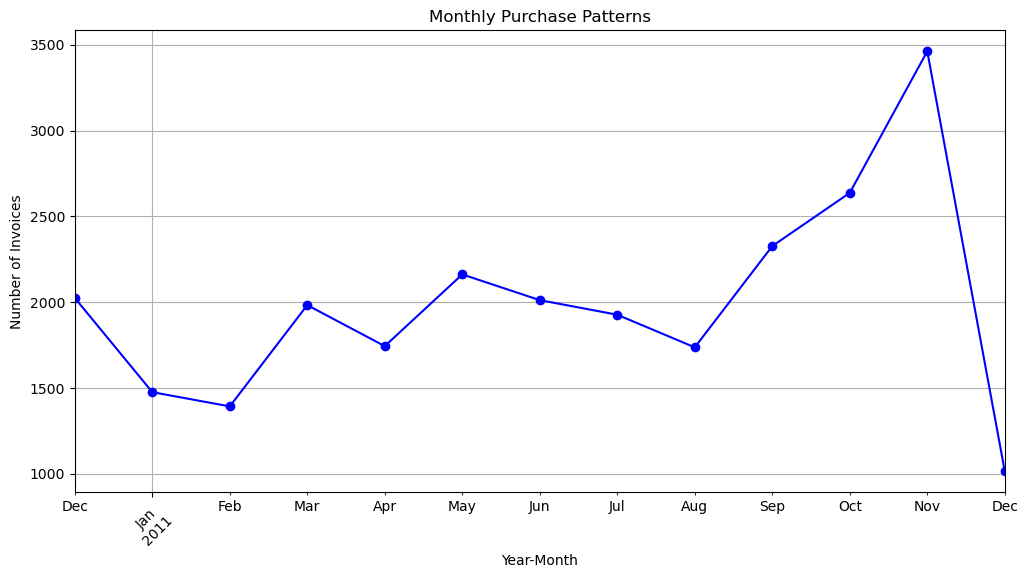

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Purchase patterns over time
dataframe['InvoiceYearMonth'] = dataframe['InvoiceDate'].dt.to_period('M')
monthly_sales = dataframe.groupby('InvoiceYearMonth')['InvoiceNo'].nunique()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Purchase Patterns')
plt.xlabel('Year-Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

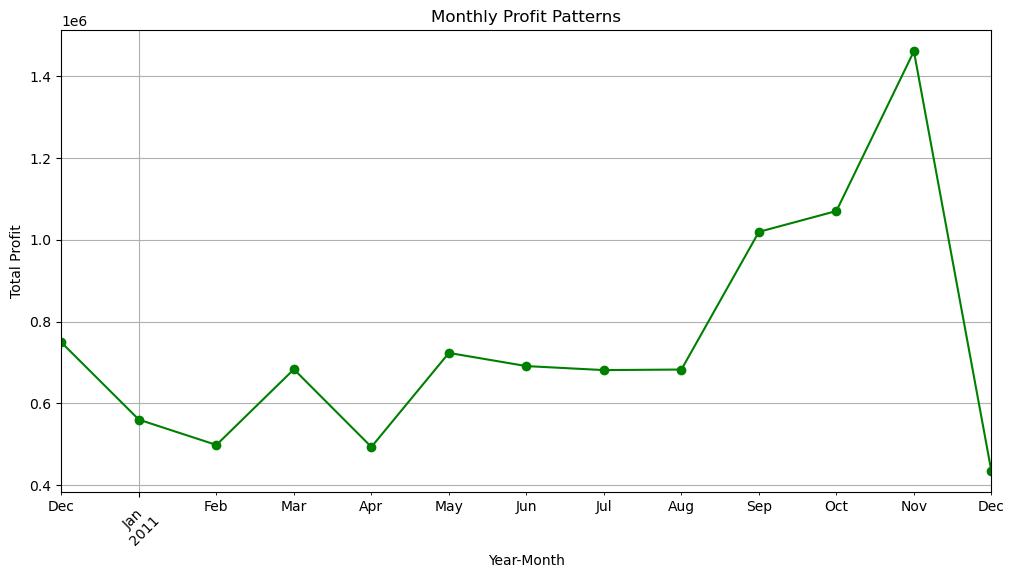

In [43]:
# Calculate the total profit for each transaction
dataframe['TotalProfit'] = dataframe['Quantity'] * dataframe['UnitPrice']

# Group by month and sum the profits
monthly_profit = dataframe.groupby('InvoiceYearMonth')['TotalProfit'].sum()

# Plot the monthly profit
plt.figure(figsize=(12, 6))
monthly_profit.plot(kind='line', marker='o', color='green')
plt.title('Monthly Profit Patterns')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/9q/7x5gwrgs4yv2gzkvb2svnhwm0000gn/T/ipykernel_4016/607691922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')


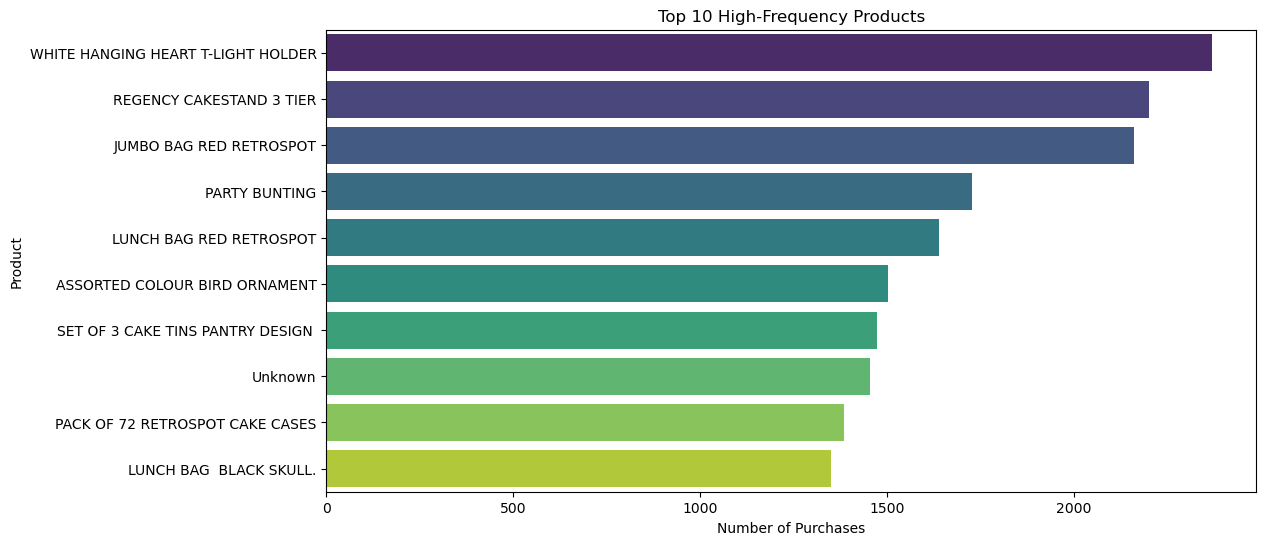

In [45]:
# High-frequency products
product_counts = dataframe['Description'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Top 10 High-Frequency Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product')
plt.show()

/var/folders/9q/7x5gwrgs4yv2gzkvb2svnhwm0000gn/T/ipykernel_4016/1328681654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')


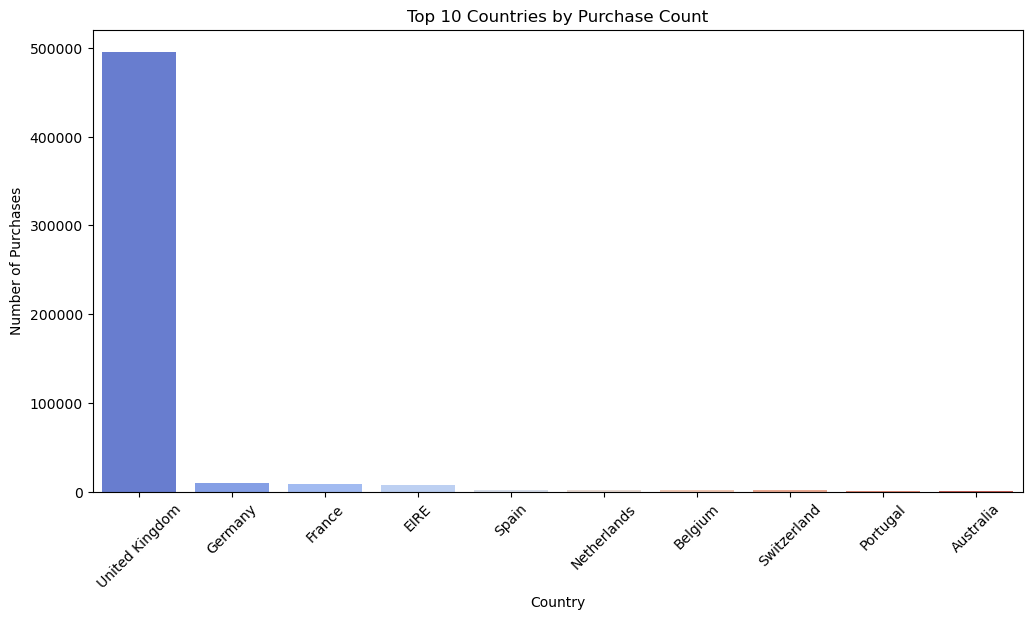

In [47]:
# Customer demographics: Purchase count by country
country_counts = dataframe['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')
plt.title('Top 10 Countries by Purchase Count')
plt.xlabel('Country')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Feature Selection and Dimensionality Reduction

In [51]:
# Save the preprocessed dataset to a CSV file
dataframe.to_csv('OnlineRetail_Preprocessed.csv', index=False)
print("Preprocessed dataset saved as 'OnlineRetail_Preprocessed.csv'")

Preprocessed dataset saved as 'OnlineRetail_Preprocessed.csv'


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataframe = pd.read_csv('OnlineRetail_Preprocessed.csv')

# Define features and target
X = dataframe[['DescriptionEncoded', 'InvoiceNoEncoded', 'StockCodeEncoded', 'CustomerID']]
y = dataframe['CountryEncoded']

# Sample the data (e.g., 10,000 rows for efficiency)
sample = dataframe.sample(n=10000, random_state=42)
X_sample = sample[['DescriptionEncoded', 'InvoiceNoEncoded', 'StockCodeEncoded', 'CustomerID']]
y_sample = sample['CountryEncoded']

# Split the sample into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

print(f"Shape of original sample: {X_sample.shape}")
print(f"Shape of training set: {X_train.shape}")
print(f"Shape of test set: {X_test.shape}")
print(f"Shape after scaling (train): {X_train_scaled.shape}")
print(f"Shape after scaling (test): {X_test_scaled.shape}")
print(f"Shape after feature selection (train): {X_train_selected.shape}")
print(f"Shape after feature selection (test): {X_test_selected.shape}")
print(f"Shape after PCA (train): {X_train_pca.shape}")
print(f"Shape after PCA (test): {X_test_pca.shape}")
print(f"Explained variance ratio (PCA): {pca.explained_variance_ratio_}")
print("Selected feature scores:", selector.scores_)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_features]
print("Selected features:", selected_feature_names)


Shape of original sample: (10000, 4)
Shape of training set: (8000, 4)
Shape of test set: (2000, 4)
Shape after scaling (train): (8000, 4)
Shape after scaling (test): (2000, 4)
Shape after feature selection (train): (8000, 3)
Shape after feature selection (test): (2000, 3)
Shape after PCA (train): (8000, 2)
Shape after PCA (test): (2000, 2)
Explained variance ratio (PCA): [0.34968218 0.33990028]
Selected feature scores: [ 1.02200993  1.70200936  1.06965936 52.35202484]
Selected features: Index(['InvoiceNoEncoded', 'StockCodeEncoded', 'CustomerID'], dtype='object')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Logistic Regression
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        33
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        35
          14       0.00      0.00      0.00        35
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         3
          26  

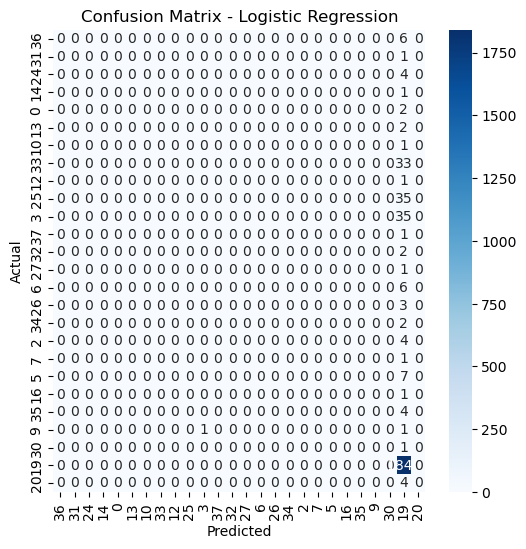

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

Model: Random Forest
Accuracy: 0.9120
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        33
          12       0.00      0.00      0.00         1
          13       0.17      0.03      0.05        35
          14       0.27      0.11      0.16        35
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         6
          25       0

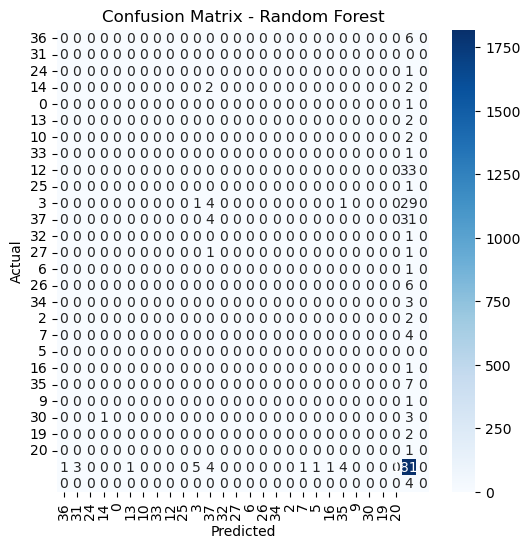

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Support Vector Classifier (SVC)
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        33
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        35
          14       0.00      0.00      0.00        35
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         3
  

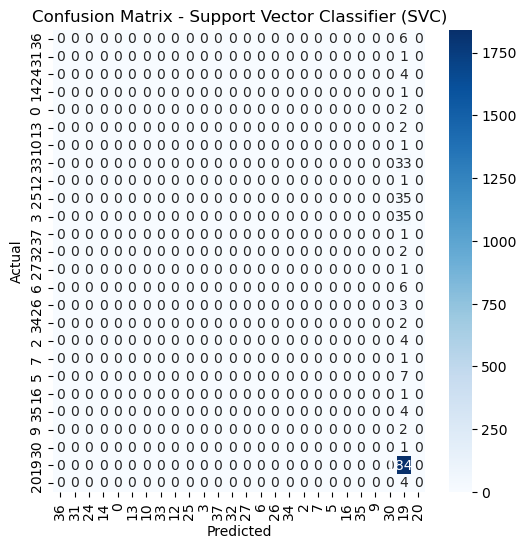

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

Model: K-Nearest Neighbors (KNN)
Accuracy: 0.9070
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        33
          12       0.00      0.00      0.00         1
          13       0.12      0.09      0.10        35
          14       0.07      0.03      0.04        35
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         6
        

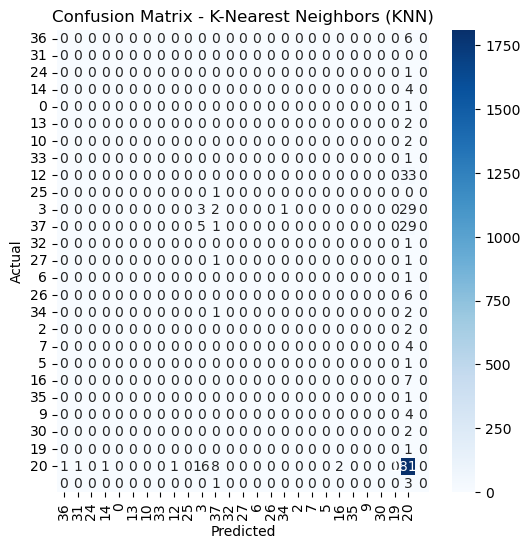

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataframe = pd.read_csv('OnlineRetail_Preprocessed.csv')
# Define features and target
X = dataframe[['DescriptionEncoded', 'InvoiceNoEncoded', 'StockCodeEncoded', 'CustomerID']]
y = dataframe['CountryEncoded']
# Sample the data (e.g., 10,000 rows for efficiency)
sample = dataframe.sample(n=10000, random_state=42)
X_sample = sample[['DescriptionEncoded', 'InvoiceNoEncoded', 'StockCodeEncoded', 'CustomerID']]
y_sample = sample['CountryEncoded']
# Split the sample into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)
# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier (SVC)': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier()
}

# Initialize an empty dictionary to store results
results = {}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train_pca, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test_pca)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cm
    }

    # Print performance metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{cm}")
    print("-" * 50)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

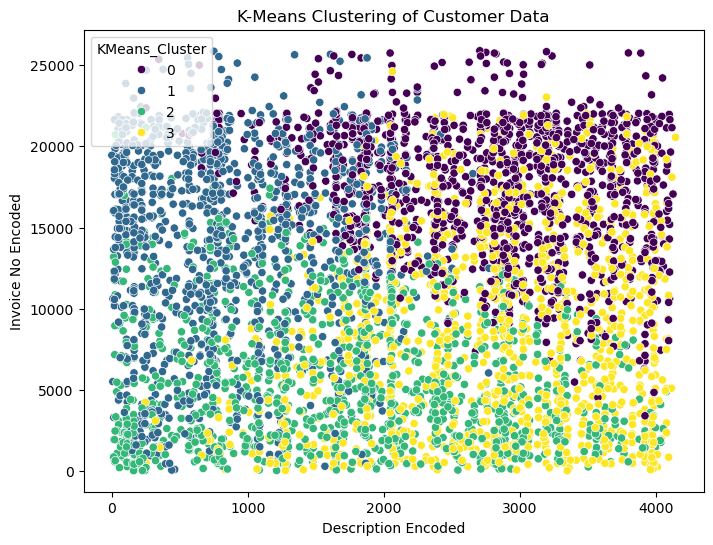

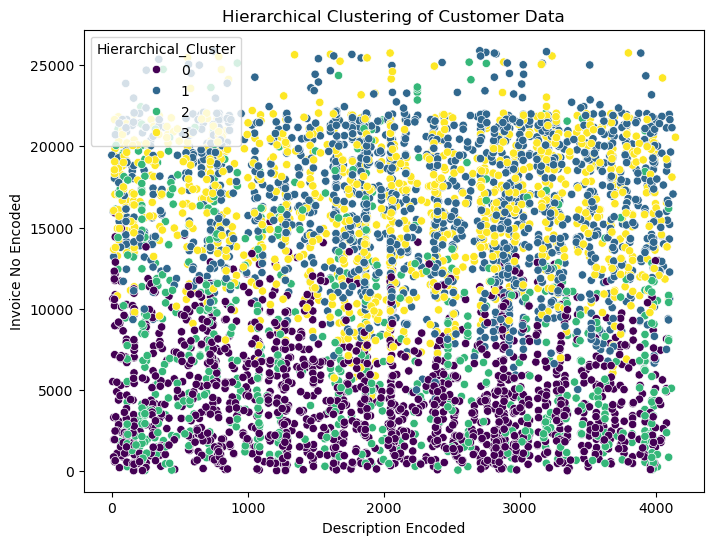

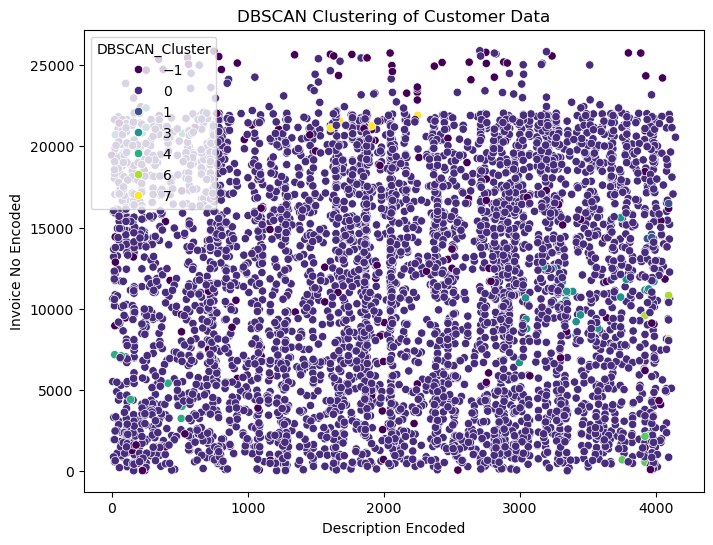

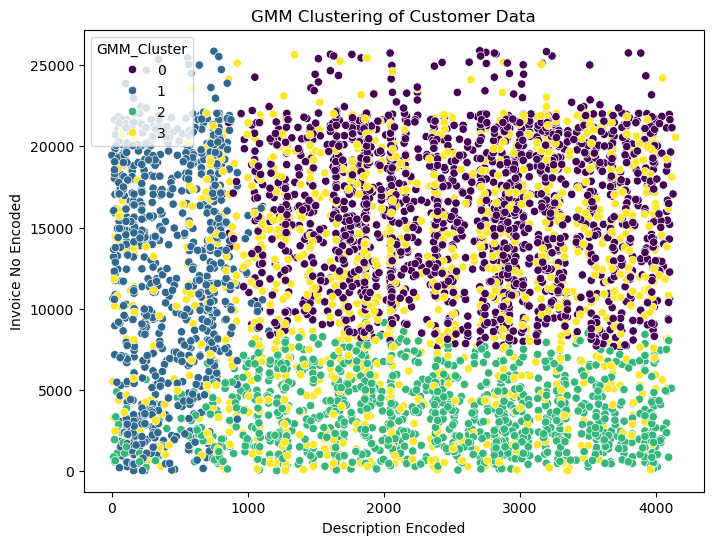

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataframe = pd.read_csv('OnlineRetail_Preprocessed.csv')

# Take a random sample of the data (e.g., 5000 rows for efficiency)
sample = dataframe.sample(n=5000, random_state=42)

# Select relevant features for clustering
X = sample[['DescriptionEncoded', 'InvoiceNoEncoded', 'StockCodeEncoded', 'CustomerID']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Basic Clustering 1: K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
sample['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Basic Clustering 2: Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
sample['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

# Advanced Clustering 1: DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
sample['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Advanced Clustering 2: Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
sample['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Visualizing K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sample['DescriptionEncoded'], y=sample['InvoiceNoEncoded'], hue=sample['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering of Customer Data")
plt.xlabel("Description Encoded")
plt.ylabel("Invoice No Encoded")
plt.show()

# Visualizing Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sample['DescriptionEncoded'], y=sample['InvoiceNoEncoded'], hue=sample['Hierarchical_Cluster'], palette='viridis')
plt.title("Hierarchical Clustering of Customer Data")
plt.xlabel("Description Encoded")
plt.ylabel("Invoice No Encoded")
plt.show()

# Visualizing DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sample['DescriptionEncoded'], y=sample['InvoiceNoEncoded'], hue=sample['DBSCAN_Cluster'], palette='viridis')
plt.title("DBSCAN Clustering of Customer Data")
plt.xlabel("Description Encoded")
plt.ylabel("Invoice No Encoded")
plt.show()

# Visualizing GMM Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sample['DescriptionEncoded'], y=sample['InvoiceNoEncoded'], hue=sample['GMM_Cluster'], palette='viridis')
plt.title("GMM Clustering of Customer Data")
plt.xlabel("Description Encoded")
plt.ylabel("Invoice No Encoded")
plt.show()


In [18]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load the dataset
dataframe = pd.read_csv('OnlineRetail_Preprocessed.csv')

# Take a random sample of the data (e.g., 5000 rows for efficiency)
sample = dataframe.sample(n=5000, random_state=42)

# Inspect the sample data to ensure there are no issues
print("Sample Data:")
print(sample.head())

# Encode the 'StockCode' and 'InvoiceNo' into binary format for transactions
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(sample[['StockCodeEncoded', 'InvoiceNoEncoded']])

# Check the shape of the encoded data
print(f"Shape of Encoded Data: {encoded_data.shape}")

# Create a DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['StockCodeEncoded', 'InvoiceNoEncoded']))

# Check the first few rows of the encoded DataFrame
print("Encoded Data Sample:")
print(encoded_df.head())

# Apply the apriori algorithm to find frequent itemsets with a lower support threshold
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)

# Check if any frequent itemsets are found
if frequent_itemsets.empty:
    print("No frequent itemsets found with the given support threshold.")
else:
    # Generate the association rules with a minimum confidence threshold
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2, num_itemsets=2)

    # Print the top 10 rules based on lift
    top_10_rules = rules.sort_values(by='lift', ascending=False).head(10)
    print(top_10_rules)


Sample Data:
       InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

                InvoiceDate  UnitPrice  CustomerID         Country  \
209268  2011-06-01 12:05:00       0.85       17315  United Kingdom   
207108  2011-05-27 17:14:00       6.95       14031  United Kingdom   
167085  2011-04-21 17:05:00       0.65       14031  United Kingdom   
471836  2011-11-16 10:39:00       1.95       17198  United Kingdom   
115865  2011-03-10 08:40:00       9.95       13502  United Kingdom   

        CountryEncoded  DescriptionEncoded  InvoiceNoEncoded  \
209268              36                1672              9

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


            Quantity      UnitPrice     TotalPrice
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114      17.987795
std       218.081158      96.759853     378.810824
min    -80995.000000  -11062.060000 -168469.600000
25%         1.000000       1.250000       3.400000
50%         3.000000       2.080000       9.750000
75%        10.000000       4.130000      17.400000
max     80995.000000   38970.000000  168469.600000

Z-Score Anomalies:
        Quantity  UnitPrice  TotalPrice  Z_Quantity  Z_TotalPrice
870          480       3.39     1627.20    2.157214      4.248063
4287       -9360       0.03     -280.80  -42.963603     -0.788752
4505         144      10.95     1576.80    0.616503      4.115015
4850        1824       0.55     1003.20    8.320057      2.600803
4945        2880       0.18      518.40   13.162291      1.321008
...          ...        ...         ...         ...           ...
540070      1500       0.72     1080.00    6.834372      2.

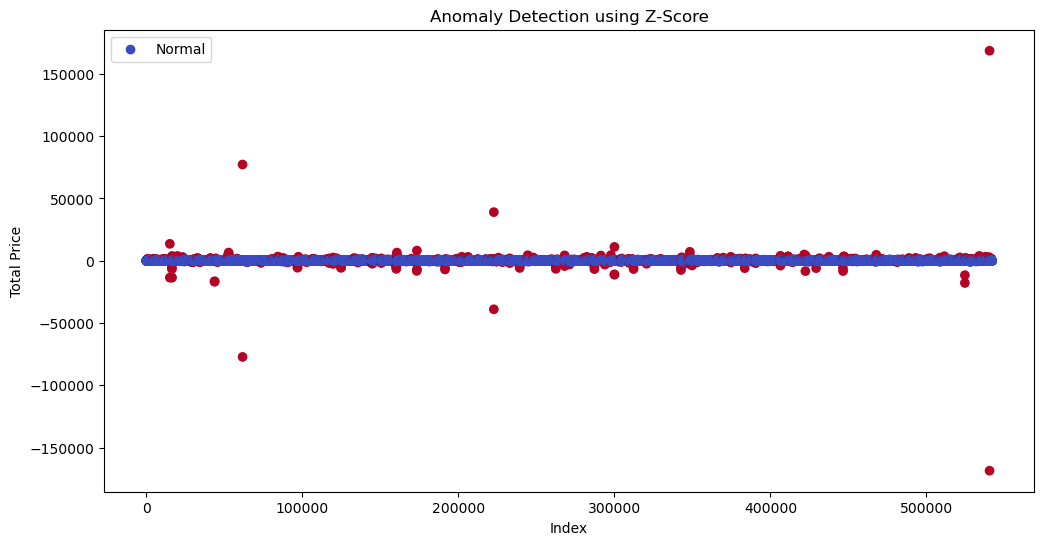

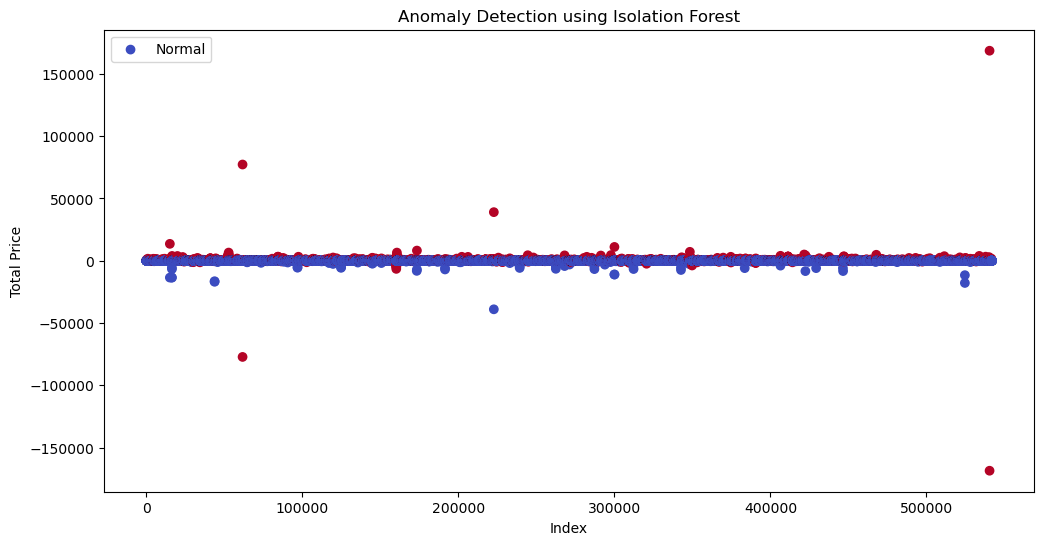

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('OnlineRetail_Preprocessed.csv')

# Calculate TotalPrice 
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Display basic info
print(data[['Quantity', 'UnitPrice', 'TotalPrice']].describe())

# Calculate Z-Scores for Quantity and TotalPrice
data['Z_Quantity'] = (data['Quantity'] - data['Quantity'].mean()) / data['Quantity'].std()
data['Z_TotalPrice'] = (data['TotalPrice'] - data['TotalPrice'].mean()) / data['TotalPrice'].std()

# Define a threshold for Z-Score anomalies (e.g., 3 standard deviations)
threshold = 3

# Flag anomalies where Z-Score exceeds the threshold
data['Z_Anomaly'] = ((data['Z_Quantity'].abs() > threshold) | (data['Z_TotalPrice'].abs() > threshold)).astype(int)

print("\nZ-Score Anomalies:")
print(data[data['Z_Anomaly'] == 1][['Quantity', 'UnitPrice', 'TotalPrice', 'Z_Quantity', 'Z_TotalPrice']])


# Select relevant features
features = data[['Quantity', 'TotalPrice']]

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination rate as needed
data['IF_Anomaly'] = iso_forest.fit_predict(features)

# Convert Isolation Forest labels: -1 (anomaly), 1 (normal) -> 1 (anomaly), 0 (normal)
data['IF_Anomaly'] = data['IF_Anomaly'].apply(lambda x: 1 if x == -1 else 0)

print("\nIsolation Forest Anomalies:")
print(data[data['IF_Anomaly'] == 1][['Quantity', 'UnitPrice', 'TotalPrice']])

print("\nComparison of Z-Score and Isolation Forest Anomalies:")
print(data[['Quantity', 'UnitPrice', 'TotalPrice', 'Z_Anomaly', 'IF_Anomaly']])


# Plot Z-Score Anomalies
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['TotalPrice'], c=data['Z_Anomaly'], cmap='coolwarm', label='Z-Score Anomaly')
plt.xlabel('Index')
plt.ylabel('Total Price')
plt.title('Anomaly Detection using Z-Score')
plt.legend(['Normal', 'Z-Score Anomaly'])
plt.show()

# Plot Isolation Forest Anomalies
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['TotalPrice'], c=data['IF_Anomaly'], cmap='coolwarm', label='IF Anomaly')
plt.xlabel('Index')
plt.ylabel('Total Price')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend(['Normal', 'Isolation Forest Anomaly'])
plt.show()

In [34]:
print(dataframe.iloc[541540])

InvoiceNo                          581498
StockCode                             DOT
Description                DOTCOM POSTAGE
Quantity                                1
InvoiceDate           2011-12-09 10:26:00
UnitPrice                         1714.17
CustomerID                          16558
Country                    United Kingdom
CountryEncoded                         36
DescriptionEncoded                   1098
InvoiceNoEncoded                    22038
StockCodeEncoded                     4059
InvoiceYearMonth                  2011-12
TotalProfit                       1714.17
Name: 541540, dtype: object


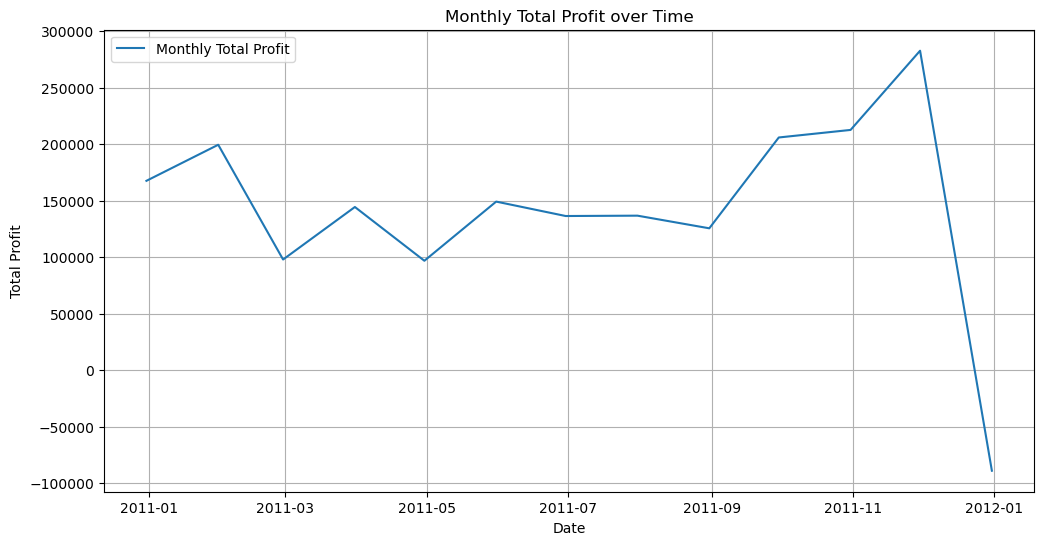

                               SARIMAX Results                                
Dep. Variable:            TotalProfit   No. Observations:                   13
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -156.704
Date:                Fri, 13 Dec 2024   AIC                            323.408
Time:                        20:28:21   BIC                            325.832
Sample:                    12-31-2010   HQIC                           322.510
                         - 12-31-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1785     16.962      0.011      0.992     -33.066      33.423
ar.L2          0.0273      6.950      0.004      0.997     -13.594      13.649
ma.L1         -1.3615     17.859     -0.076      0.9

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


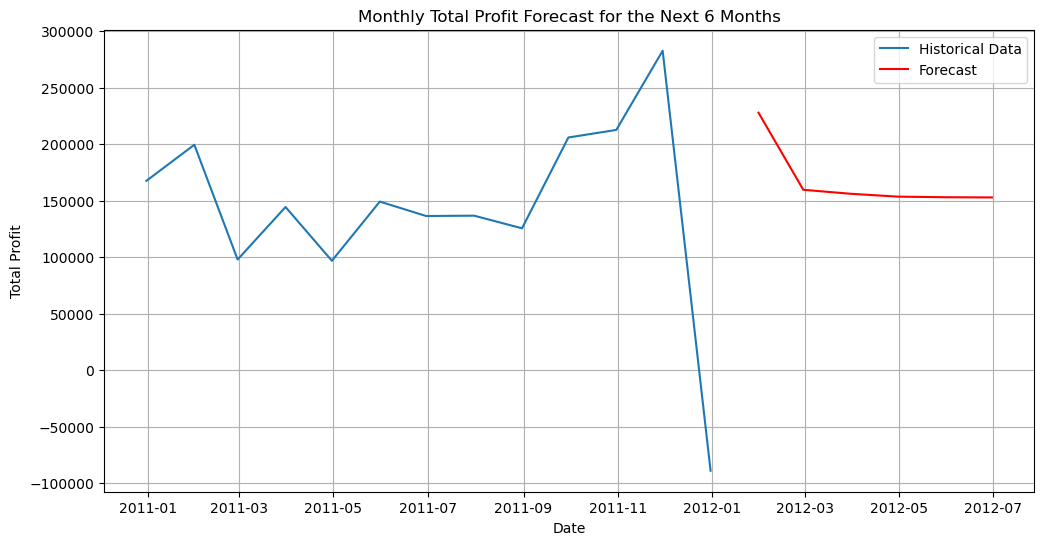

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('OnlineRetail_Preprocessed.csv', parse_dates=['InvoiceDate'])
# taking 20% of data
sample_data = data.sample(frac=0.2, random_state=42)

#  'InvoiceDate' is the datetime type ?
sample_data['InvoiceDate'] = pd.to_datetime(sample_data['InvoiceDate'])
sample_data.set_index('InvoiceDate', inplace=True)

# Resample the data to monthly frequency, summing 'TotalProfit' for each month
monthly_data = sample_data.resample('ME').agg({'TotalProfit': 'sum'})

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['TotalProfit'], label='Monthly Total Profit')
plt.title('Monthly Total Profit over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.legend()
plt.grid(True)
plt.show()

# Fit an ARIMA model 
model = ARIMA(monthly_data['TotalProfit'], order=(2, 1, 2))  # (p,d,q) parameters
model_fit = model.fit()

print(model_fit.summary())

forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['TotalProfit'], label='Historical Data')
plt.plot(pd.date_range(monthly_data.index[-1], periods=forecast_steps+1, freq='ME')[1:], forecast, label='Forecast', color='red')
plt.title(f'Monthly Total Profit Forecast for the Next {forecast_steps} Months')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
import pandas as pd

# Load the dataset and check the columns
data = pd.read_csv('OnlineRetail_Preprocessed.csv')
print(data.columns)  # This will print all column names in your dataset


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'CountryEncoded',
       'DescriptionEncoded', 'InvoiceNoEncoded', 'StockCodeEncoded',
       'InvoiceYearMonth', 'TotalProfit'],
      dtype='object')


In [50]:
import itertools
import statsmodels.api as sm

p = range(0, 5)  # Try p values from 0 to 4
d = range(0, 2)  # Try d values 0 and 1 (d=0 for stationary, d=1 for first difference)
q = range(0, 5)  # Try q values from 0 to 4

pdq_combinations = list(itertools.product(p, d, q))

results = []

for param in pdq_combinations:
    try:
        model = ARIMA(monthly_data['TotalProfit'], order=param)
        model_fit = model.fit()
        results.append((param, model_fit.aic))  # Store parameters and corresponding AIC
    except Exception as e:
        print(f"Error with ARIMA{param}: {e}")
        continue

# Find the parameters with the lowest AIC
best_param, best_aic = min(results, key=lambda x: x[1])
print(f"Best parameters: {best_param} with AIC: {best_aic}")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/

Best parameters: (2, 1, 2) with AIC: 153.41046144036932


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import pandas as pd
from transformers import pipeline

data = pd.read_csv('JAL_tripadvisor_reviews.csv')

reviews = data['title'].dropna().tolist()

sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment") 

results = sentiment_analyzer(reviews)

sentiment_counts = {"positive": 0, "neutral": 0, "negative": 0}

for result in results:
    label = result['label'].lower()
    if "5" in label or "4" in label:
        sentiment_counts["positive"] += 1
    elif "3" in label:
        sentiment_counts["neutral"] += 1
    elif "2" in label or "1" in label:
        sentiment_counts["negative"] += 1

print("Sentiment Summary:")
print(f"Positive: {sentiment_counts['positive']}")
print(f"Neutral: {sentiment_counts['neutral']}")
print(f"Negative: {sentiment_counts['negative']}")

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')


ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text.lower())
    words = [ps.stem(word) for word in tokens if word.isalnum() and word not in stop_words]
    return words

data['Processed_Reviews'] = data['title'].apply(process_text)

all_words = [word for review in data['Processed_Reviews'] for word in review]
most_common_words = Counter(all_words).most_common(20)

print("20 Most Common Words with Stemming:")
for word, count in most_common_words:
    print(f"{word}: {count}")

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Most Common Words After Stemming")
plt.xticks(rotation=45)
plt.show()